# Decision Tree

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138


In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

In [4]:
# splitting the imported dataset as train(70%) and test(30%) sets.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1999, 71) (1999,)
(857, 71) (857,)


In [5]:
# Standard scaler is used to scale all the features to have equal weightage

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

> folds = 2, accuracy = 0.571 with std = 0.007
> folds = 3, accuracy = 0.618 with std = 0.028
> folds = 4, accuracy = 0.646 with std = 0.018
> folds = 5, accuracy = 0.638 with std = 0.014
> folds = 6, accuracy = 0.650 with std = 0.008
> folds = 7, accuracy = 0.665 with std = 0.016
> folds = 8, accuracy = 0.668 with std = 0.013
> folds = 9, accuracy = 0.667 with std = 0.021
> folds = 10, accuracy = 0.665 with std = 0.018


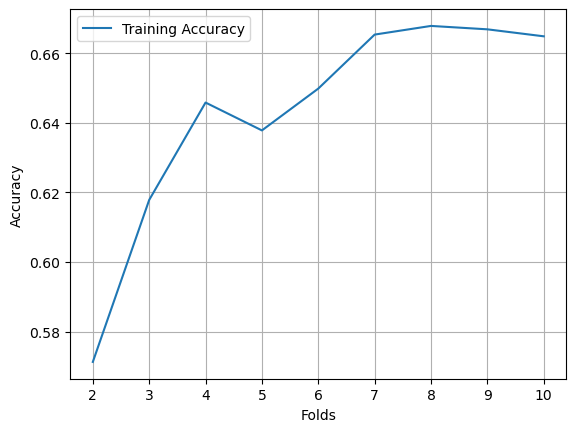

In [6]:
# k-fold cross validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold

ax = list(range(2, 11))
ay = []

# finding the best K value for K-fold cross validation
for n in ax:
    cv = KFold(n_splits = n, shuffle = True, random_state = 222)
    scores = cross_val_score(tree.DecisionTreeClassifier(), x_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
    ay.append(mean(scores))
    print('> folds = %d, accuracy = %.3f with std = %.3f' % (n, mean(scores), std(scores)))
    
plt.plot(ax, ay, label = 'Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.xticks(ax)
plt.legend()
plt.grid()

In [7]:
# using randomized search to find the optimal hyperparameters

rs = RandomizedSearchCV(estimator = tree.DecisionTreeClassifier(),
                        param_distributions = {'max_depth': range(10, 51),
                                               'min_samples_split': range(2, 20),
                                               'criterion': ['gini', 'entropy'],
                                               'random_state' : [222]},
                        scoring="accuracy", cv= 9, random_state = 222)

rs.fit(x_train, y_train)
rs.best_score_, rs.best_params_

(0.6698514658155914,
 {'random_state': 222,
  'min_samples_split': 4,
  'max_depth': 23,
  'criterion': 'gini'})

In [8]:
# train & test accuracies 

y_pred_train = rs.predict(x_train)
y_pred_test = rs.predict(x_test)

train_score = accuracy_score(y_pred_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(y_pred_test, y_test)
print("score on test data: ", test_score)

score on train data:  0.9589794897448725
score on test data:  0.676779463243874


## Confusion Matrix & Classification Report

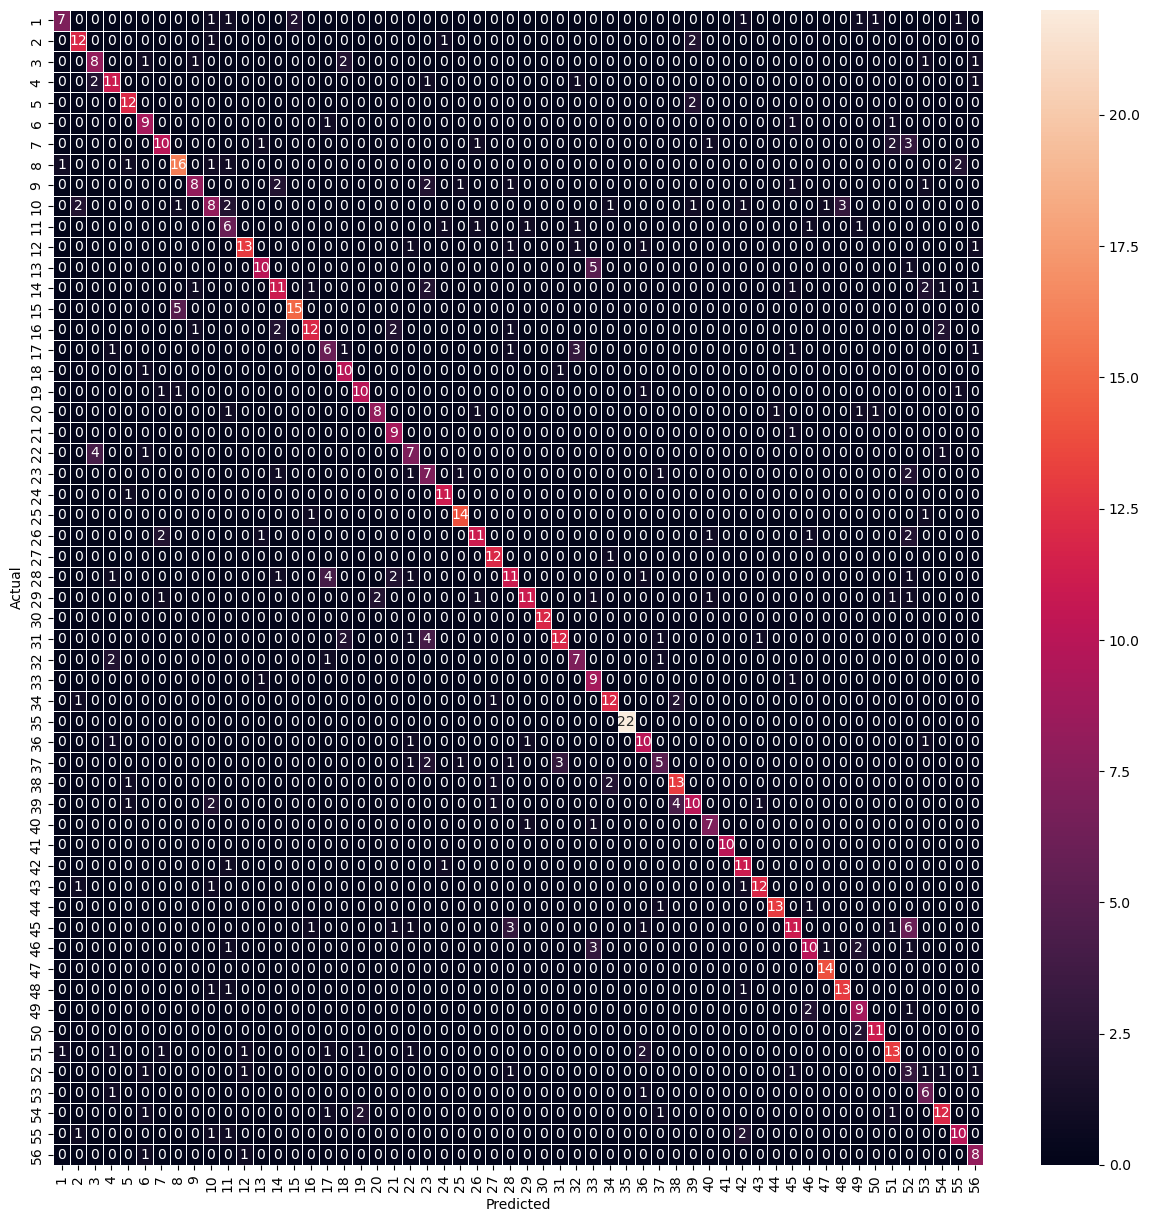

In [9]:
# Confusion matrix 

cm = confusion_matrix(y_pred_test, y_test)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, 
            xticklabels = list(range(1,57)),
            yticklabels = list(range(1,57)))
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [10]:
# Classification report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         1.0       0.47      0.78      0.58         9
         2.0       0.75      0.71      0.73        17
         3.0       0.57      0.57      0.57        14
         4.0       0.69      0.61      0.65        18
         5.0       0.86      0.75      0.80        16
         6.0       0.75      0.60      0.67        15
         7.0       0.56      0.67      0.61        15
         8.0       0.73      0.70      0.71        23
         9.0       0.50      0.73      0.59        11
        10.0       0.40      0.50      0.44        16
        11.0       0.50      0.40      0.44        15
        12.0       0.72      0.81      0.76        16
        13.0       0.62      0.77      0.69        13
        14.0       0.55      0.65      0.59        17
        15.0       0.75      0.88      0.81        17
        16.0       0.60      0.80      0.69        15
        17.0       0.43      0.43      0.43        14
        18.0       0.83    